<a href="https://colab.research.google.com/github/SeyedMehdi110/Per-1/blob/main/Perceptron_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

df=pd.read_table('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale',
              sep=r'\s+\d+:', engine='python', header=None).loc[:,:]
df.head()

,0,1,2,3,4,5,6,7,8
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [2]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [3]:
#set NaN to 0
df.fillna(0, inplace=True)

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    float64
 2   2       768 non-null    float64
 3   3       768 non-null    float64
 4   4       768 non-null    float64
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    float64
 8   8       768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [5]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,1:]
y = df.iloc[:,0]

# TRAIN and TEST SPLIT

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (614, 8)
y_train shape:  (614,)
X_test shape:  (154, 8)
y_test shape:  (154,)


In [6]:
N=X_train.columns
from random import seed
from random import random
seed(10)
w=[random() for i in range(len(N))]
elearn=.0001
T=1500
total=0
accuracy=[]
weights=[]
for t in range(T):
        for i in range(len(X_train)):
            if y_train.iloc[i]*np.dot(X_train.iloc[i,:],w)<0:
                activation=1
            else:
                activation=0
            total=total+activation*(y_train.iloc[i]*X_train.iloc[i,:])
        w_new=w+elearn*total
        weights.append(w_new)
        w=w_new
        test_prediction = []
        for i in range(len(X_test)):
            if np.dot(X_test.iloc[i,:],w)>0:
                prediction = 1
                test_prediction.append(1)
            else:
                prediction = -1 
                test_prediction.append(-1)
        accuracy.append(accuracy_score(y_test,test_prediction))

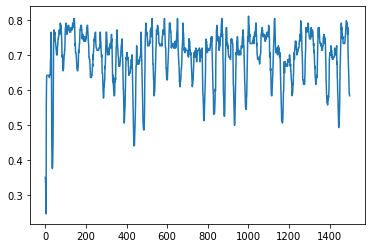

In [7]:
plt.plot(range(1500),accuracy)

In [9]:
w=weights[accuracy.index(max(accuracy))]
w=np.array(w)
test_prediction = []
for i in range(len(X_test)):
    if np.dot(X_test.iloc[i,:],w)>0:
        prediction = 1
        test_prediction.append(1)
    else:
        prediction = -1 
        test_prediction.append(-1)

In [10]:
print(confusion_matrix(y_test,test_prediction))
print(classification_report(y_test,test_prediction))
print('accuracy_score= ',accuracy_score(y_test,test_prediction))
RMSE_test=np.sqrt(mean_squared_error(y_test, test_prediction))
print('RMSE_test= ',RMSE_test)

[[37 18]
 [11 88]]
              precision    recall  f1-score   support

          -1       0.77      0.67      0.72        55
           1       0.83      0.89      0.86        99

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

accuracy_score=  0.8116883116883117
RMSE_test=  0.8678978933300583


In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test,Y_pred))
print(classification_report(y_test,Y_pred))
print('accuracy_score= ',accuracy_score(y_test,Y_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test, Y_pred))
print('RMSE_test= ',RMSE_test)

[[31 24]
 [ 8 91]]
              precision    recall  f1-score   support

          -1       0.79      0.56      0.66        55
           1       0.79      0.92      0.85        99

    accuracy                           0.79       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.79      0.79      0.78       154

accuracy_score=  0.7922077922077922
RMSE_test=  0.9116846116771036


In [12]:
# loading libraries
from sklearn import decomposition, datasets
from sklearn import neighbors
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler


# Creating an scaler object
std_slc = StandardScaler()
    
# Create a pca object
pca = decomposition.PCA()
    
# Create a KNN object with an L2 penalty
KNN = neighbors.KNeighborsClassifier()
    
# Creating a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('KNN', KNN)])

In [13]:
# Creating Parameter Space
# Create a list of a sequence of integers from 1 to the number of features in X + 1)
n_components = list(range(1,X.shape[1]+1,1))
    
# Creating lists of parameter for KNeighborsRegressor()
n_neighbors = [2, 3, 5, 10]
algorithm = ['auto',  'ball_tree', 'kd_tree', 'brute']
    
# Creating a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                      KNN__n_neighbors=n_neighbors,
                      KNN__algorithm=algorithm)

# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
modelKNN = GridSearchCV(pipe, parameters)
    
# Fitting the grid search
modelKNN.fit(X, y)

# Viewing The Best Parameters
print('Best Number Of Components:', modelKNN.best_estimator_.get_params()['pca__n_components'])
print(); print(modelKNN.best_estimator_.get_params()['KNN'])

# Use Cross Validation To Evaluate Model
CV_Result = cross_val_score(modelKNN, X, y, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Number Of Components: 8

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



[0.73046875 0.72265625 0.7421875 ]

0.7317708333333334

0.008026580733032522


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   17.3s finished


In [14]:
#modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

y_pred1 = modelKNN.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print('accuracy_score= ',accuracy_score(y_test,y_pred1))
RMSE_test=np.sqrt(mean_squared_error(y_test, y_pred1))
print('RMSE_test= ',RMSE_test)

[[34 21]
 [ 9 90]]
              precision    recall  f1-score   support

          -1       0.79      0.62      0.69        55
           1       0.81      0.91      0.86        99

    accuracy                           0.81       154
   macro avg       0.80      0.76      0.78       154
weighted avg       0.80      0.81      0.80       154

accuracy_score=  0.8051948051948052
RMSE_test=  0.8827348295047496
